# Data for Xalapa

- Source: `http://sinaica.inecc.gob.mx/`
- Station: STPS (STP)
- Coords: 19.53 N, 96.88 O

In [1]:
import pandas as pd
import h3
import matplotlib.pyplot as plt

lat, long = (19.53, -96.88)
no = pd.read_csv('no.csv', parse_dates=['Fecha'])
no2 = pd.read_csv('no2.csv', parse_dates=['Fecha'])

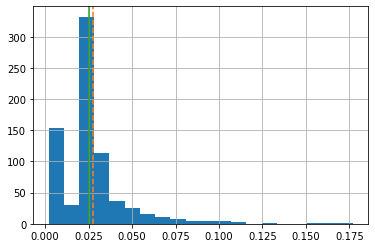

In [2]:
(no.Valor).hist(bins=20)
plt.axvline(no.Valor.mean(), color='C1', linestyle='--')
plt.axvline(no.Valor.median(), color='C2', linestyle='-')

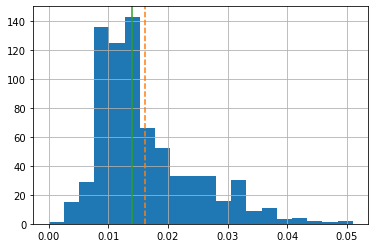

In [3]:
(no2.Valor).hist(bins=20)
plt.axvline(no2.Valor.mean(), color='C1', linestyle='--')
plt.axvline(no2.Valor.median(), color='C2', linestyle='-')

Close enough, will use mean to match with Quito

In [4]:
def get_mean_for_april(df):
    return df[df.Fecha.dt.month == 4].Valor.mean()*1000 # ppm to ppb

In [5]:
h3id = h3.geo_to_h3(lat, long, 9)

In [6]:
final_df = pd.DataFrame([[h3id, get_mean_for_april(no), get_mean_for_april(no2)]], columns=["h3id", "NO", "NO2"])

In [7]:
final_df.to_csv('xalapa2019.csv', index=False)